In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ['cylinders','timetosixty','year','brand']

In [3]:
dataset = pd.read_csv("cars.csv", header=0, names=col_names)
dataset.head()

,cylinders,timetosixty,year,brand
0,8,16,1975,US.
1,6,16,1977,US.
2,6,16,1978,US.
3,8,10,1971,US.
4,4,18,1982,Japan.


In [4]:
features = ['cylinders','timetosixty','year']
X = dataset[features]
Y = dataset.brand

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [6]:
classifer = DecisionTreeClassifier(criterion="entropy", max_depth=3)
classifer = classifer.fit(X_train,y_train)
prediction = classifer.predict(X_test)


In [7]:
classifer.predict([[8,16,1971]])

array([' US.'], dtype=object)

In [8]:
classifer.predict_proba([[8,16,1971]])

array([[0., 0., 1.]])

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.7368421052631579


In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


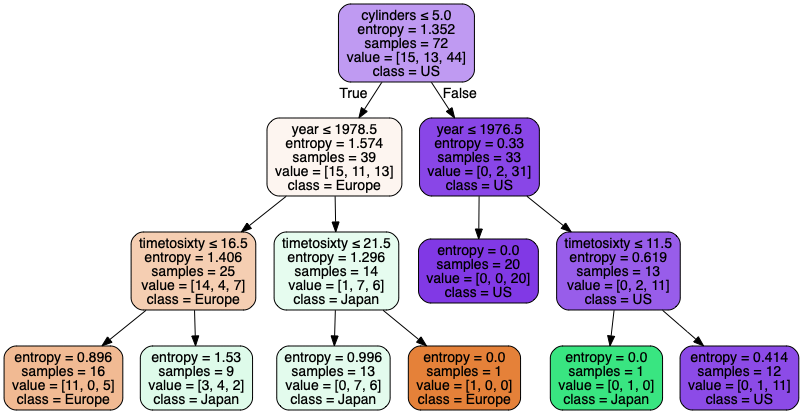

In [11]:
dot_data = StringIO()
export_graphviz(classifer, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['Europe','Japan','US'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())